In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/content/python_justice.csv")
df.head()


,Sr No.,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [ ]:

print(df.info())
print(df.isnull().sum())

df['issue_area'] = df['issue_area'].fillna('Unknown')
df['decision_type'] = df['decision_type'].fillna('Unknown')


df = df.dropna(subset=['majority_vote', 'minority_vote'])

df = df.drop_duplicates()


print("Remaining missing values:")
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sr No.              3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   name                3303 non-null   object
 3   href                3303 non-null   object
 4   docket              3292 non-null   object
 5   term                3303 non-null   object
 6   first_party         3302 non-null   object
 7   second_party        3302 non-null   object
 8   facts               3303 non-null   object
 9   facts_len           3303 non-null   int64 
 10  majority_vote       3303 non-null   int64 
 11  minority_vote       3303 non-null   int64 
 12  first_party_winner  3288 non-null   object
 13  decision_type       3303 non-null   object
 14  disposition         3231 non-null   object
 15  issue_area          3303 non-null   object
 16  total_votes         3303

In [ ]:

print("Numerical Features Summary:")
print(df.describe())

print("\nCategorical Features Summary:")
print(df.describe(include='object'))

print("\nDecision Type Counts:")
print(df['decision_type'].value_counts())


Numerical Features Summary:
            Sr No.            ID    facts_len  majority_vote  minority_vote  \
count  3303.000000   3303.000000  3303.000000    3303.000000    3303.000000   
mean   1651.000000  56336.505298  1112.496821       7.009688       1.727823   
std     953.638296   3600.259018   531.514960       1.726244       1.604460   
min       0.000000  50606.000000    26.000000       0.000000       0.000000   
25%     825.500000  54339.500000   757.000000       5.000000       0.000000   
50%    1651.000000  55260.000000  1049.000000       7.000000       2.000000   
75%    2476.500000  59437.500000  1381.000000       9.000000       3.000000   
max    3302.000000  63335.000000  6201.000000       9.000000       4.000000   

       total_votes  
count  3303.000000  
mean      8.737511  
std       0.910172  
min       0.000000  
25%       9.000000  
50%       9.000000  
75%       9.000000  
max       9.000000  

Categorical Features Summary:
                            name        

In [ ]:

df['total_votes'] = df['majority_vote'] + df['minority_vote']


df[['majority_vote', 'minority_vote', 'total_votes']].head()


,majority_vote,minority_vote,total_votes
0,7,2,9
1,5,2,7
2,7,0,7
3,7,0,7
4,5,4,9


In [ ]:

print("Numerical Features Summary:")
print(df.describe())

print("\nCategorical Features Summary:")
print(df.describe(include='object'))


print("\nDecision Type Counts:")
print(df['decision_type'].value_counts())


Numerical Features Summary:
       decision_type
count             14
unique             5
top         Approved
freq               4

Categorical Features Summary:
       decision_type
count             14
unique             5
top         Approved
freq               4

Decision Type Counts:
decision_type
Approved     4
Pending      4
Rejected     3
Escalated    2
Withdrawn    1
Name: count, dtype: int64


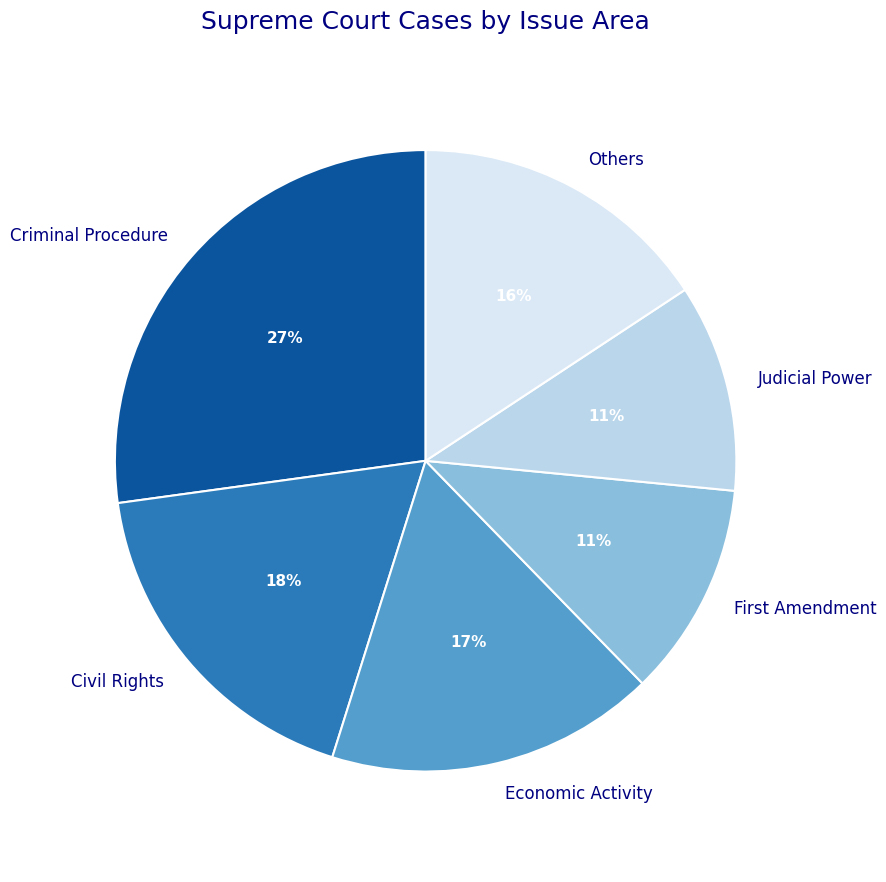

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("python_justice.csv")
issue_counts = data['issue_area'].value_counts()

threshold = 5
total = issue_counts.sum()
small_segments = issue_counts[issue_counts / total * 100 < threshold]
large_segments = issue_counts[issue_counts / total * 100 >= threshold]

if not small_segments.empty:
    combined_counts = large_segments.copy()
    combined_counts['Others'] = small_segments.sum()
else:
    combined_counts = issue_counts

num_slices = len(combined_counts)
gradient_colors = sns.color_palette("Blues", n_colors=num_slices)[::-1]

plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(combined_counts, labels=combined_counts.index,
                                   autopct='%1.0f%%', startangle=90,
                                   colors=gradient_colors,
                                   textprops={'fontsize': 12, 'color': 'navy'},
                                   wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')
for text in texts:
    text.set_fontsize(12)
plt.title('Supreme Court Cases by Issue Area', fontsize=18, color='navy', pad=15)
plt.axis('equal')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()

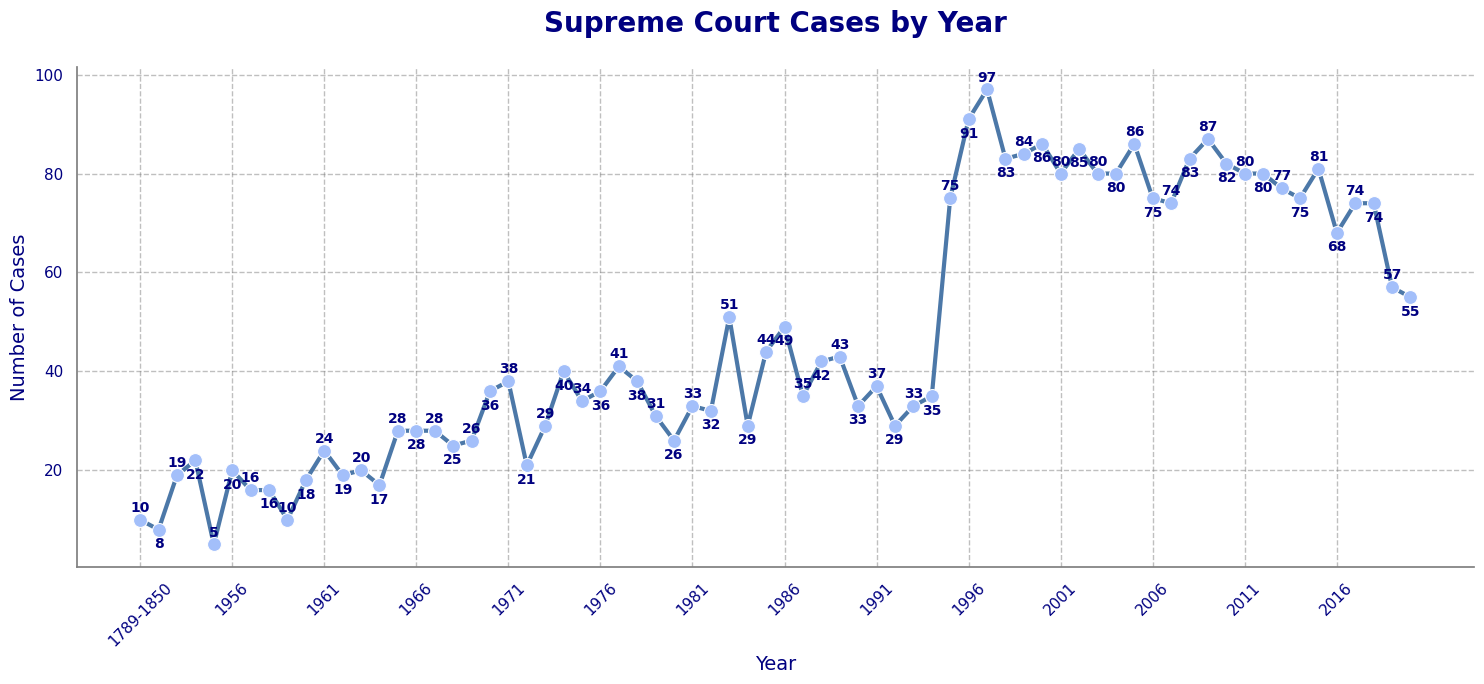

In [ ]:

cases_per_year = df['term'].value_counts().sort_index()

plt.figure(figsize=(15, 7))
ax = sns.lineplot(
    x=cases_per_year.index,
    y=cases_per_year.values,
    marker='o',
    linewidth=3,
    color='#4C78A8',
    markersize=10,
    markeredgecolor='white',
    markerfacecolor='#A3BFFA',
)

for i, (x, y) in enumerate(zip(cases_per_year.index, cases_per_year.values)):
    offset = 1 if i % 2 == 0 else -1.5
    ax.text(x, y + offset, str(y), ha='center', va='bottom' if offset > 0 else 'top',
            fontsize=10, color='navy', weight='semibold')


plt.title("Supreme Court Cases by Year", fontsize=20, fontweight='bold',
          color='navy', pad=25)
plt.xlabel("Year", fontsize=14, color='navy')
plt.ylabel("Number of Cases", fontsize=14, color='navy')
plt.xticks(rotation=45, fontsize=11, color='navy')
plt.yticks(fontsize=11, color='navy')


if len(cases_per_year) > 20:
    step = max(len(cases_per_year) // 12, 1)
    plt.xticks(cases_per_year.index[::step])


plt.grid(True, linestyle='--', alpha=0.5, color='gray')
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

plt.tight_layout()
plt.show()

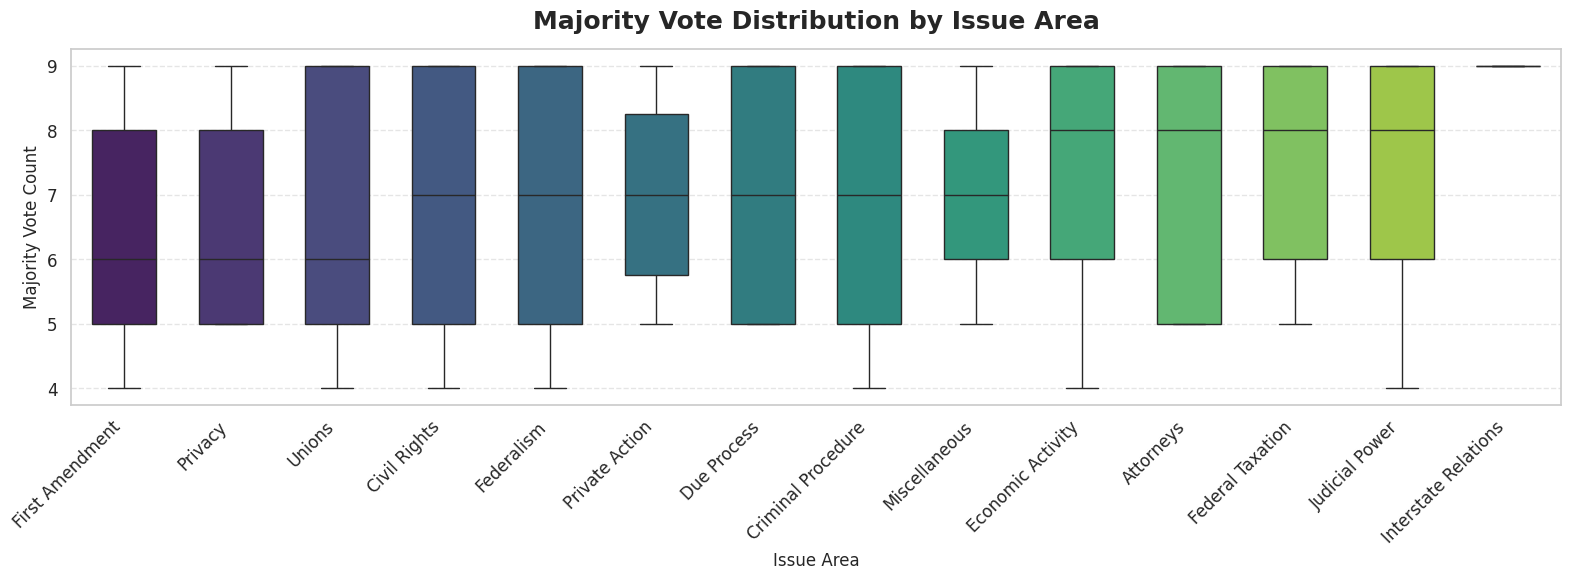

In [ ]:

order = df.groupby('issue_area')['majority_vote'].median().sort_values().index

plt.figure(figsize=(16, 6))
sns.set(style="whitegrid", font_scale=1.1)

sns.boxplot(
    x='issue_area',
    y='majority_vote',
    data=df,
    palette='viridis',
    order=order,
    width=0.6,
    fliersize=0
)

plt.title("Majority Vote Distribution by Issue Area", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Issue Area", fontsize=12)
plt.ylabel("Majority Vote Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🔗 Correlation Matrix:
               majority_vote  minority_vote  total_votes
majority_vote           1.00          -0.85         0.39
minority_vote          -0.85           1.00         0.14
total_votes             0.39           0.14         1.00


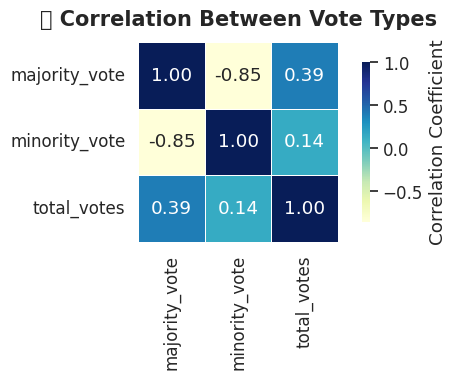

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = df[['majority_vote', 'minority_vote', 'total_votes']].corr()

print("🔗 Correlation Matrix:")
print(correlation_matrix.round(2))


plt.figure(figsize=(6, 4))
sns.set(style="white", font_scale=1.1)
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)



plt.title("🔍 Correlation Between Vote Types", fontsize=15, fontweight='bold', pad=12)
plt.tight_layout()
plt.show()


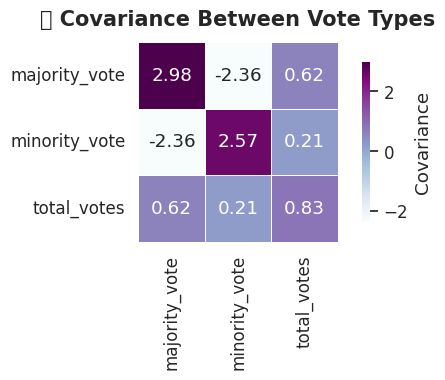

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(
    covariance_matrix,
    annot=True,
    fmt=".2f",
    cmap='BuPu',
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Covariance'}
)

plt.title("📐 Covariance Between Vote Types", fontsize=15, fontweight='bold', pad=12)
plt.tight_layout()
plt.show()


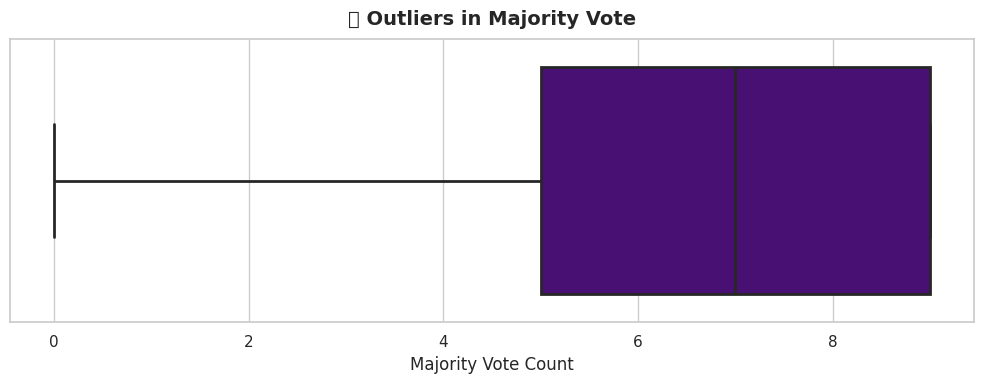

📌 Outlier cases found: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

sns.boxplot(
    x=df['majority_vote'],
    color='#4B0082',
    fliersize=5,
    linewidth=2
)



plt.title("🔍 Outliers in Majority Vote", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Majority Vote Count")
plt.tight_layout()
plt.show()


Q1 = df['majority_vote'].quantile(0.25)
Q3 = df['majority_vote'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['majority_vote'] < lower_bound) | (df['majority_vote'] > upper_bound)]

print(f"📌 Outlier cases found: {len(outliers)}")
